**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Marsaglia (Pham-Gia) analytical form of Hake ratio PDF
</font>

<font size=5> Computational tools: </font>  **<font size=5>SageMath</font>**  

---

#### Sec. 2.2, preprint
**Theorem 3** (Marsaglia (2006); Pham-Gia et al. (2007)).  
For $W=X_1 / X_2$, there are constants $r$ and $s$ such that:  
$r(W-s)$ is distributed as $T=\frac{a+V_1}{b+V_2}$,  
$W$ is distributed as $\frac{1}{r} T+s$, where $s=\frac{\sigma_1}{\sigma_2} \rho, r=\frac{\sigma_1}{\sigma_2} \sqrt{1-\rho^2}$  

$$
\begin{gathered}
f_W(w)=\frac{1}{\frac{\sigma_1}{\sigma_2} \sqrt{1-\rho^2}} f_T\left(\frac{w-\rho \frac{\sigma_1}{\sigma_2}}{\frac{\sigma_1}{\sigma_2} \sqrt{1-\rho^2}}\right), \\
\left(V_1, V_2\right) \sim \mathcal{B N}(0,0 ; 1,1,0), b=\frac{\mu_2}{\sigma_2} \geq 0, a= \pm \frac{\mu_1 / \sigma_1-\rho \mu_2 / \sigma_2}{\sqrt{1-\rho^2}} \geq 0, \\
f_T(t)=\frac{1}{\exp \left(\frac{a^2+b^2}{2}\right) \pi\left(1+t^2\right)}{ }_1 F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; \frac{(a t+b)^2}{2\left(1+t^2\right)}\right),
\end{gathered}
$$

where ${ }_1 F_1\left(\begin{array}{l}\alpha \\ \beta\end{array} ; z\right)$ is Kummer's confluent hypergeometric function.

**Refs.**
- Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*
- Marsaglia, George. 2006. “Ratios of Normal Variables.” Journal of Statistical Software 16 (4). https://doi.org/10.18637/jss.v016.i04.
- Pham-Gia, T., N. Turkkan, and E. Marchand. 2007. “Density of the Ratio of Two Normal Random Variables and Applications.” Communications in Statistics - Theory and Methods 35 (9): 1569–91. https://doi.org/10.1080/03610920600683689.

In [1]:
# variables
a, b, t, q = var('a,b,t,q')

# Given that q = (b + a*t) / sqrt(1 + t^2) is the upper boundary from 0 to q,
# the following condition must also hold
assume(b + a*t > 0)

In [2]:
# Individual terms for f_T according to Thm 3
f_k(t) = exp(-(a^2+b^2)/2)/(pi*(1+t^2))
q = (b + a*t)/sqrt(1+t^2)
M(a,b,z) = hypergeometric_M(a,b,z)
# definition of f_T
f_T(t) = f_k(t)*M(1,1/2, q^2/2)
show(f_T(t))

e^(-1/2*a^2 - 1/2*b^2)*hypergeometric_M(1, 1/2, 1/2*(a*t + b)^2/(t^2 + 1))/(pi*(t^2 + 1))

In [3]:
# another form of pdf
show(f_T(t).simplify_hypergeometric().canonicalize_radical())

(sqrt(pi)*(I*a*t + I*b)*erf(1/2*sqrt(2)*(I*a*t + I*b)/sqrt(-t^2 - 1))*e^(1/2*(a^2*t^2 + 2*a*b*t + b^2)/(t^2 + 1)) + sqrt(2)*sqrt(-t^2 - 1))/((sqrt(2)*pi*t^2*e^(1/2*a^2 + 1/2*b^2) + sqrt(2)*pi*e^(1/2*a^2 + 1/2*b^2))*sqrt(-t^2 - 1))

# Plot for specific values

In [4]:
# specific values from the preprint
a_val, b_val = 3/2, 1
values = [a == a_val, b == b_val]
fT(t) = f_T(t).subs(values)
fT.show()

t |--> e^(-13/8)*hypergeometric_M(1, 1/2, 1/8*(3*t + 2)^2/(t^2 + 1))/(pi*(t^2 + 1))

In [5]:
# Layout of the plots
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Parameters for the graph
color = 'blue'
graphTitle = f'Density function of the ratio: ${str(values).replace('==','=')}$'
legendTitle = 'PDF of $T$'
xmin, xmax = -4.5, 7.5
gf = plot([], figsize=(8, 5), title=graphTitle, frame=True)

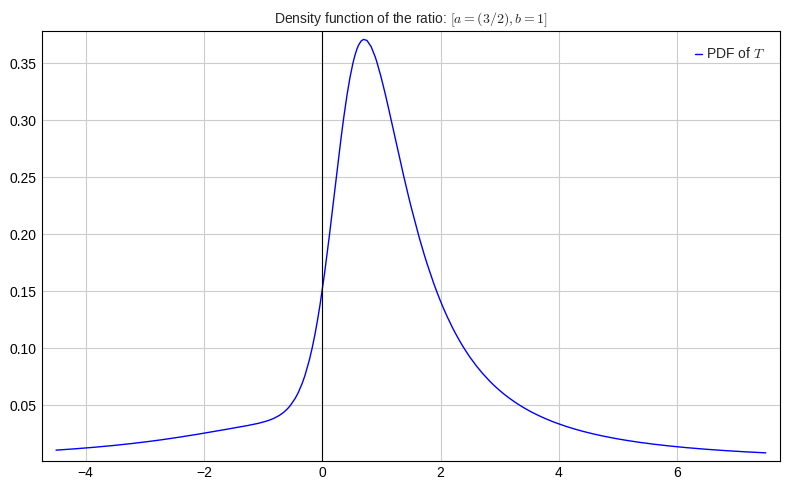

In [6]:
# plot of fT
gf+= plot(fT(t), (t, xmin, xmax), color='blue',legend_label=legendTitle)
gf